In [2]:
import sys, os

import numpy as np

import pickle

import torch
from pytorch_msssim import MS_SSIM
from tqdm import tqdm

import model, generator, visuals




In [11]:
FOLDER_PATH = "/home/garysnake/Desktop/crsae/pytorch/results/default/2020_05_22_12_47_27/"
HYP_PATH = FOLDER_PATH+"hyp.pickle"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

file = open(HYP_PATH, "rb")
hyper_parameter = pickle.load(file)
file.close()
for name, val in hyper_parameter.items():
    print(str(name) + ": " + str(val))


experiment_name: default
dataset: VOC
network: CRsAE2DUntiedTrainableBias
dictionary_dim: 7
num_conv: 32
stride: 6
L: 5
trainable_bias: True
delta: 50
num_iters: 10
batch_size: 1
num_epochs: 15
normalize: True
lr: 0.0005
lr_decay: 0.7
lr_step: 20
lr_lam: 0.0001
cyclic: False
noiseSTD: 20
shuffle: True
test_path: ../data/test_img/
train_path: ../data/test_img/
device: cuda:0
warm_start: True
info_period: 10
denoising: True
supervised: True
crop_dim: [250, 250]
init_with_DCT: False
init_with_saved_file: False
sigma: 0.18
loss: L1
lam: 0.1
twosided: True
image_set: train
year: 2012
segmentation: True
redo: 1


In [12]:
MODEL_PATH = FOLDER_PATH+"model_epoch0.pt"
result_model = torch.load(MODEL_PATH)
dictionary = result_model.get_param("H").data
dictionary = dictionary.view((dictionary.size()[0],dictionary.size()[2],dictionary.size()[3]))
print(dictionary.size())


    

torch.Size([32, 7, 7])


In [6]:
# Loss_redo5 = []

# for i in range(5):
#     file = open(FOLDER_PATH+"loss_epoch{}..npy".format(i), "rb")
#     loss = np.load(file)
#     file.close()

#     Loss_redo5.append(loss)
# Loss_redo5 = np.array(Loss_redo5).reshape(-1)

    

In [7]:
# print(Loss_redo1.mean())
# print(Loss_redo5.mean())
# print(Loss_redo5_2.mean())
# print(Loss_redo10.mean())

# Loss_redo5 = np.mean(np.split(Loss_redo5[:730], 73),1)
# Loss_redo5_2 = np.mean(np.split(Loss_redo5_2[:730], 73),1)
# Loss_redo10 = np.mean(np.split(Loss_redo10[:730], 73),1)
# print(np.size(Loss_redo1))
# print(np.size(Loss_redo5))
# print(np.size(Loss_redo5_2))
# print(np.size(Loss_redo10))



In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt

In [9]:
# plt.style.use('seaborn-darkgrid')
# palette = plt.get_cmap('Set1')

# plt.plot(Loss_redo1[:30],linewidth=2, alpha=0.9, label="Step=1")
# plt.plot(np.mean(np.split(Loss_redo5[:7300], 100),1)[:30],linewidth=2,color='red', alpha=0.9, label="Step=5")
# plt.plot(np.mean(np.split(Loss_redo5_2[:7300], 100),1)[:30], linewidth=2, alpha=0.9, label="Step=10")
# plt.plot(np.mean(np.split(Loss_redo10[:7300], 100)[:30],1),linewidth=2, alpha=0.9, label="Step=30")

# plt.legend(loc=1, ncol=1)

# plt.title("Loss vs. Epochs(Alternation Step)", loc='left', fontsize=12, fontweight=0, color='black')
# plt.xlabel("Epoch")
# plt.ylabel("Loss")

In [5]:

"""
Data_loader is iterable
[ (image1_tensor, label1_tensor), ...]
"""
# If you want path support different dataset, use below
# data_loader = generator.get_path_loader(1, DATA_PATH, shuffle=False)
data_loader = generator.get_VOC_loader(1, "val")
print(len(data_loader))

# Split for visualization
data_nparray = np.array([one_data[0].view(-1).numpy() for one_data in data_loader])
labels_nparray = np.array([one_data[1] for one_data in data_loader])




Using downloaded and verified file: ../data/VOCtrainval_11-May-2012.tar
1449


In [23]:
# temp = iter(data_loader)
# temp.next()
# temp.next()
# temp.next()
# temp.next()
# temp.next()[0].size()




torch.Size([1, 1, 250, 250])

  1%|          | 9/1449 [00:01<04:19,  5.55it/s]


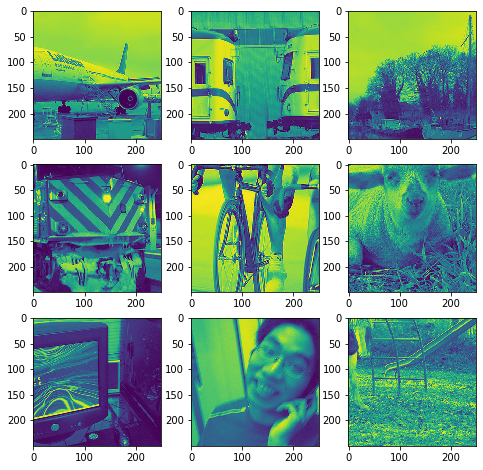

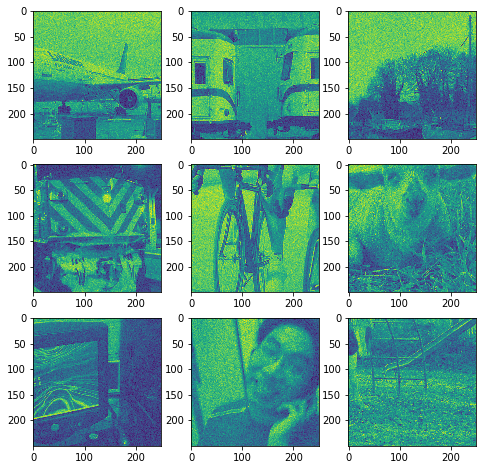

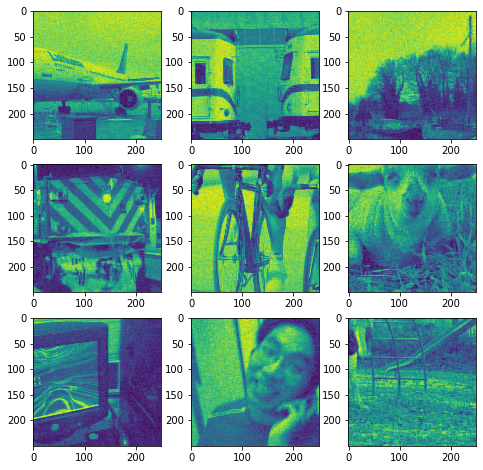

In [10]:
 
test_img_list = []
noisy_img_list = []
embedding_model_np = []
img_model_np = []
num_data = 10
noiseSTD = 20

with torch.no_grad():
    for i, (img_test, _) in enumerate(tqdm(data_loader)):
        test_img_list.append(img_test.numpy())
        noisy_img = (img_test + noiseSTD / 255 * torch.randn(img_test.shape)).to(DEVICE)
        img_new, x_new, _ = result_model(noisy_img)
        noisy_img_list.append(noisy_img.view(-1).to("cpu").detach().numpy())
        embedding_model_np.append(x_new.view(-1).to("cpu").detach().numpy())
        img_model_np.append(img_new.view(-1).to("cpu").detach().numpy())
        if i == num_data-1:
            break

embedding_model_np = np.array(embedding_model_np)

# Visualize the image itself to see the noisy input
visuals.visualize_img(test_img_list[:9], labels_nparray[:9], (250,250))
visuals.visualize_img(noisy_img_list[:9], labels_nparray[:9], (250,250))
visuals.visualize_img(img_model_np[:9], labels_nparray[:9], (250,250))
    

In [37]:
visuals.visualize_img(dictionary, labels_nparray[:10], (28,28))

torch.Size([36, 30, 30])


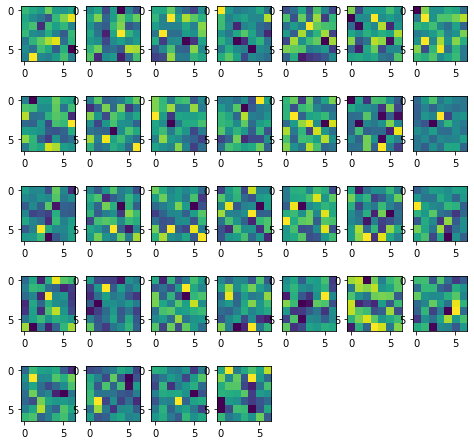

In [13]:
visuals.visualize_dictionary(dictionary.cpu())


In [302]:

FOLDER_PATH = "/home/garysnake/Desktop/crsae/pytorch/results/default/2020_05_07_21_01_55/"

psnr_redo5_2 = []

PSNR = np.load(FOLDER_PATH + "psnr_init.npy")
print(np.mean(PSNR))
for i in range(10):
    PSNR = np.load(FOLDER_PATH + "psnr_epoch{}.npy".format(i))
    psnr_redo5_2.append(np.mean(PSNR))

10.216708541330364


FileNotFoundError: [Errno 2] No such file or directory: '/home/garysnake/Desktop/crsae/pytorch/results/default/2020_05_07_21_01_55/psnr_epoch6.npy'

In [303]:
np.array(psnr_redo1)
np.array(psnr_redo5)
np.array(psnr_redo5_2)
np.array(psnr_redo10)

print(psnr_redo1)
print(psnr_redo5)
print(psnr_redo5_2)
print(psnr_redo10)

print(len(psnr_redo1))
print(len(psnr_redo5))
print(len(psnr_redo5_2))
print(len(psnr_redo10))

print(np.mean(psnr_redo1))
print(np.mean(psnr_redo5))
print(np.mean(psnr_redo5_2))
print(np.mean(psnr_redo10))

[24.75780006291138, 25.544448389361303, 26.094440050009226, 26.529332227591013, 26.819165243456762, 26.99665383539266]
[27.269428531742758, 27.510525081306696, 27.50983128324151, 27.62369231424398, 27.75211250823405, 27.79441379217638]
[27.37519843089912, 27.574183106836344, 27.640922295136583, 27.718284090773928, 27.78577827124132, 27.88330974885159]
[27.21270477813151, 27.424459947894018, 27.32294899928901, 27.589151555051405, 27.758824521054823, 27.827147338539362]
6
6
6
6
26.12363996812039
27.576667251824233
27.662945990623147
27.52253952332669


Text(0, 0.5, 'Loss')

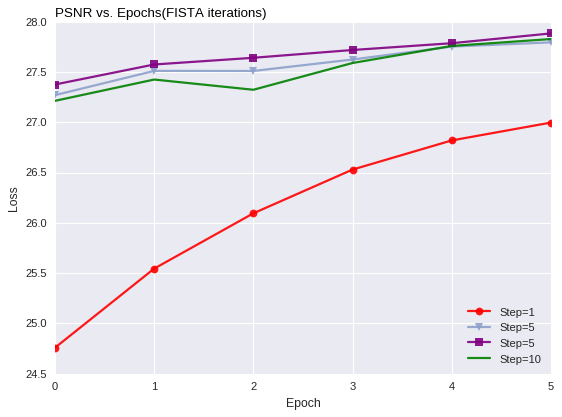

In [305]:
plt.style.use('seaborn')

fig = plt.figure()
ax = fig.add_subplot(111)

palette = plt.get_cmap('Set2')

plt.plot(psnr_redo1,linewidth=2, marker = 'o', color='red', alpha=0.9, label="Step=1")
plt.plot(psnr_redo5,linewidth=2, marker = 'v', color=palette(2), alpha=0.9, label="Step10")
plt.plot(psnr_redo5_2,linewidth=2, marker = 's', color='purple', alpha=0.9, label="Step=5")
plt.plot(psnr_redo10, color='green', marker = 'x', linewidth=2, alpha=0.9, label="Step=30")

plt.legend(loc=4, ncol=1)

plt.title("PSNR vs. Epochs(Alternation Step)", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Epoch")
plt.ylabel("Loss")


# plt.ylim(-10, 595)
